In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import nilearn as nl
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score



c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
feat_file = 'c:\\Users\\jyoth\\Documents\\Code\\fMRI'+'\\O13.csv'
res=pd.read_csv(feat_file, header=0)
print("Data file found.", feat_file)
y_target=res['y']
age=res['age']
sex=res['sex']

Data file found. c:\Users\jyoth\Documents\Code\fMRI\O13.csv


In [3]:
xt1 = res.drop(['y','age','sex'],axis=1)

In [4]:
xt1.columns = xt1.columns.astype(str)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(xt1,y_target , random_state=104, test_size=0.25, shuffle=True)

Naive Bayes

In [6]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
NB = GaussianNB()

# Train the model using the training sets
NB.fit(X_train,y_train)

GaussianNB()

Accuracy:  0.375
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


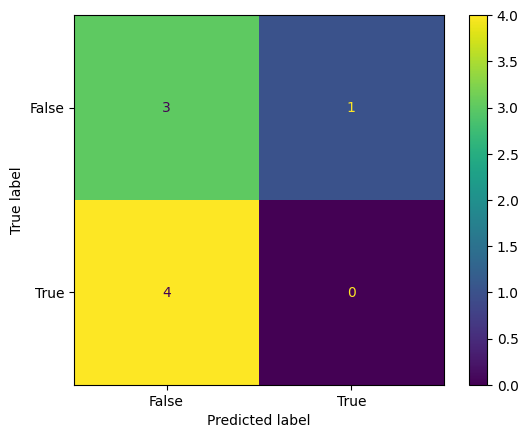

In [7]:
prednb = NB.predict(X_test)
precision = precision_score(y_test, prednb)
recall = recall_score(y_test, prednb)
 
print('Accuracy: ',accuracy_score(y_test,prednb))
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, prednb))


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, prednb), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

Logistic Regression

c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.375
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


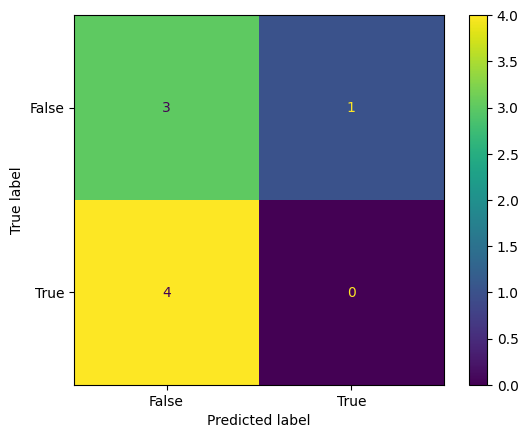

In [8]:
from sklearn.linear_model import LogisticRegression


LR = LogisticRegression()
LR.fit(X_train, y_train)
predlr=LR.predict(X_test)

precision = precision_score(y_test, predlr)
recall = recall_score(y_test, predlr)
 
print('Accuracy: ',accuracy_score(y_test,predlr)) 
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, predlr))


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predlr), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

Random Forest

c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.5
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


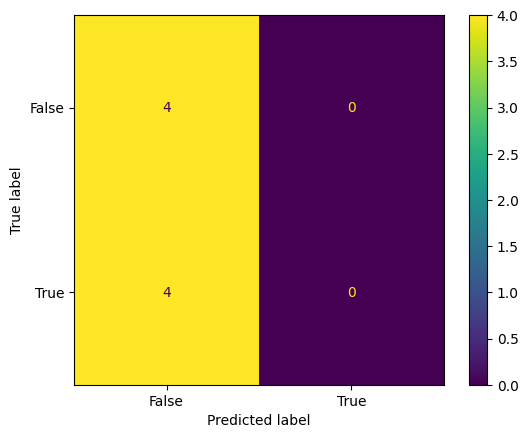

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model using the training data
rf.fit(X_train, y_train)
predrf = rf.predict(X_test)

precision = precision_score(y_test, predrf)
recall = recall_score(y_test, predrf)

print('Accuracy: ',accuracy_score(y_test,predrf))
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, predrf))

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predrf), display_labels = [False, True]) 
cm_display.plot()
plt.show() 


ANN


In [10]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train1 = sc.fit_transform(X_train)
X_test1 = sc.fit_transform(X_test)

In [11]:

tf.random.set_seed(3)

ann = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1)
])

try: # check if feature file already exists
        # load features
    feat_file = os.path.join(os.getcwd(), '1O13ModelX')
    ann.load_weights('1O13ModelX')

except: # SGD is short for stochastic gradient descent
  ann.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),  metrics=["mae"])
  ann.fit(X_train1,y_train,batch_size=64,epochs = 100)



Epoch 1/100
1/1 [==============================] - 1s 974ms/step - loss: 1.1498 - mae: 1.1498
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 0.8870 - mae: 0.8870
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7238 - mae: 0.7238
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.8117 - mae: 0.8117
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 0.8437 - mae: 0.8437
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7357 - mae: 0.7357
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7182 - mae: 0.7182
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.8569 - mae: 0.8569
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 0.8961 - mae: 0.8961
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 0.8796 - mae: 0.8796
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - l

In [12]:
res=(ann.predict(X_test1))
y_res=[]
ct=0
cf=0
for i in res:
    if i>0.5:
        y_res.append(1)
    else:
        y_res.append(0)


1/1 [==============================] - 0s 184ms/step


Accuracy:  0.75
Precision:  0.75
Recall:  0.75
F1 Score:  0.75


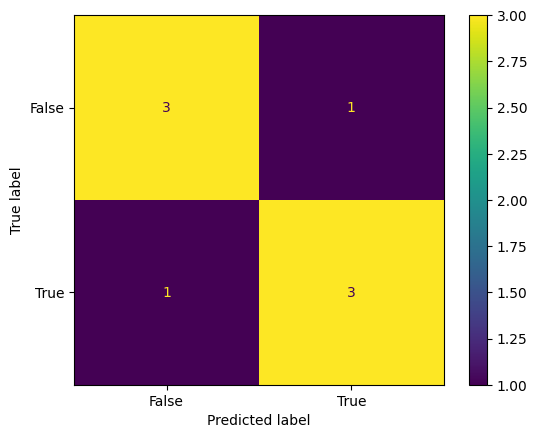

In [13]:
precision = precision_score(y_test, y_res)
recall = recall_score(y_test, y_res)

print('Accuracy: ',accuracy_score(y_test,y_res))
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, y_res))

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_res), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

In [86]:
#ann.save_weights('O13ModelX')

Voting


In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_predhard = vot_hard.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_predhard)
print("Hard Voting Score % d" % score)
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_predsoft = vot_soft.predict(X_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_predsoft)
print("Soft Voting Score % d" % score)

Hard Voting Score  0
Soft Voting Score  0


Accuracy:  0.375


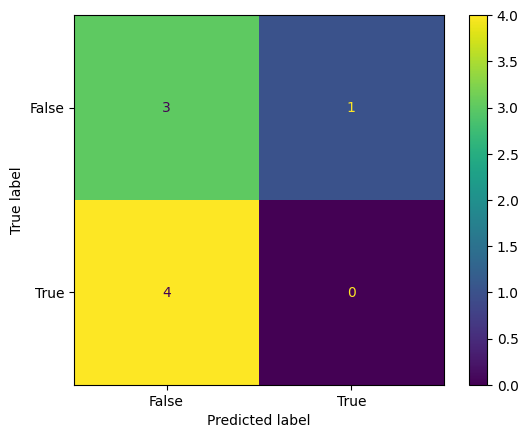

In [15]:
print('Accuracy: ',accuracy_score(y_test,y_predhard))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_predhard), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

Accuracy:  0.375


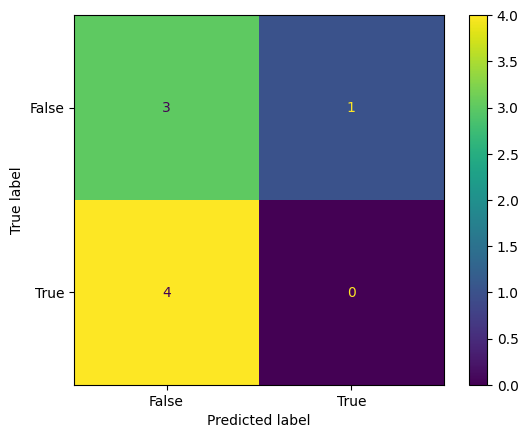

In [16]:
print('Accuracy: ',accuracy_score(y_test,y_predsoft))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_predsoft), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

Ensemble

In [17]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
seed = 8
kfold = model_selection.KFold(n_splits = 3)
 
# initialize the base classifier
base_cls = DecisionTreeClassifier()
 
# no. of base classifier
num_trees = 500
 
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,  n_estimators = num_trees,random_state = seed)
 
results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold)
print("accuracy :")
print(results.mean())


c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


accuracy :
0.6011904761904763


c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


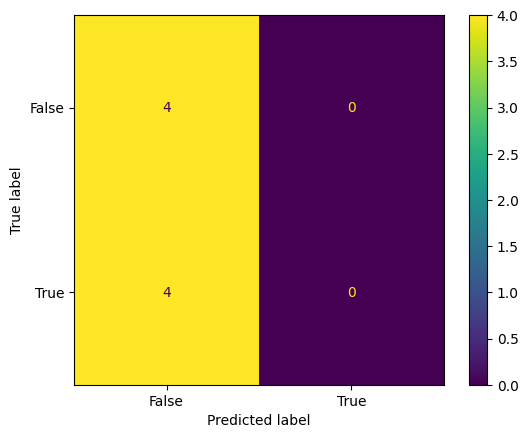

In [19]:


model.fit(X_train,y_train)
y_predbag=model.predict(X_test)
#print('Accuracy: ',accuracy_score(y_test,results))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_predbag), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

XGBoost

In [20]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Accuracy:  0.5


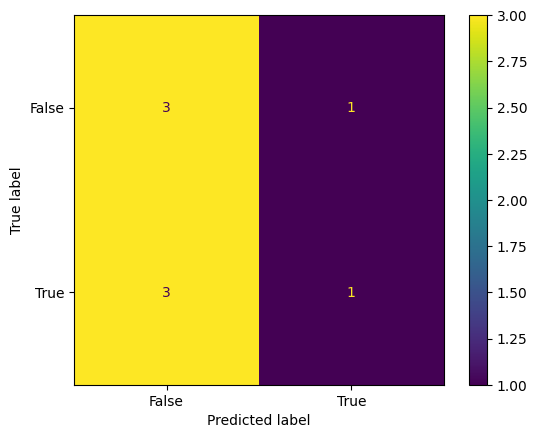

In [21]:

 
# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = my_model.predict(X_test)
 
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print('Accuracy: ',accuracy_score(y_test,y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [False, True]) 
cm_display.plot()
plt.show() 

In [22]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, y_pred))


Precision:  0.5
Recall:  0.25
F1 Score:  0.3333333333333333


In [15]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = X_train
Y = y_train
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
 
# baseline
def create_baseline():
 # create model
 model = Sequential()
 model.add(Dense(2017, input_shape=(2017,), activation='relu'))
 model.add(Dense(30,  activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 sgd = SGD(learning_rate=0.01, momentum=0.8)
 model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
 return model
 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Baseline: 61.67% (19.79%)
